<a href="https://colab.research.google.com/github/Bagautdino/LAB1/blob/main/Bagautdinov_Ayvaz_N32451_labs_siad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1

---



Выполнил: Багаутдинов Айваз N32451


---



## Задание

1.   Используйте метод K-средних и метод DBSCAN на самостоятельно сгенерированной выборке с количеством кластеров не менее 4. Для увеличения числа кластеров при генерации можно задать количество центров в функции make_blobs через параметр centers.
2.   Используйте эти же два метода на датасете [Mall_Customers](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).
3.   Для каждого метода необходимо построить график.

## Ход работы

Импортируем библиотеки

In [ ]:
import pandas as pd
import numpy as np


from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
%matplotlib inline

Подготовим случайные данные для обработки.

In [ ]:
X, y = make_blobs(n_samples=600, random_state=43, centers=6)

Полученные данные

In [ ]:
print(X[:5])

[[-7.73907691 -6.68530106]
 [ 4.43753693 -0.27094863]
 [-8.56219136  2.71643015]
 [-7.98067961 -3.49472935]
 [-3.89485941  6.34043299]]


[[-7.73907691 -6.68530106]

 [ 4.43753693 -0.27094863]

 [-8.56219136  2.71643015]

 [-7.98067961 -3.49472935]
 
 [-3.89485941  6.34043299]]

Визуализируем сырые данные

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(8,4)

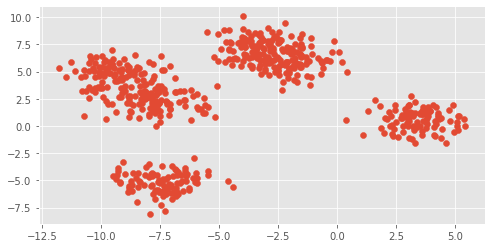

In [ ]:
plt.scatter(X[:,0], X[:,1])

### Задание 1

Импортируем модели

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

#### Kmeans

Определяем и обучаем модель KMeans

In [ ]:
kmeansModel = KMeans(n_clusters=4, random_state=5) #Используем 4 кластера
kmeansModel.fit(X)
print(kmeansModel.labels_[:10], "More...")

[1 2 3 1 0 0 0 3 0 2] More...


Наблюдаем результат

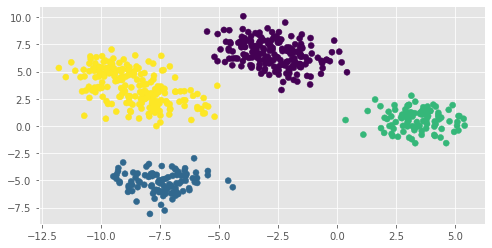

In [ ]:
plt.scatter(X[:,0], X[:,1], c=kmeansModel.labels_)

Используем метод локтя

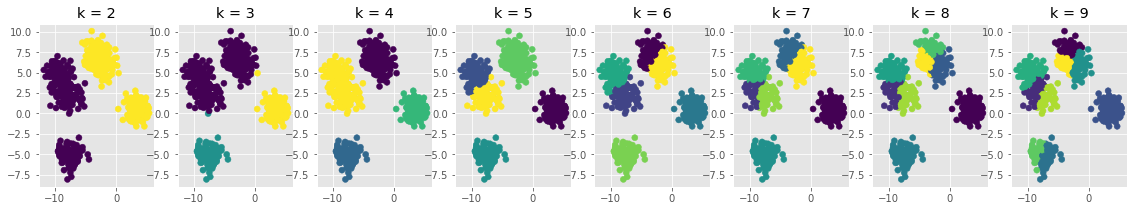

In [ ]:
criteries = []
plt.rcParams['figure.figsize']=(22,3)
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=5)
  kmeansModel.fit(X)
  criteries.append(kmeansModel.inertia_)
  plt.subplot(190 + k - 1)
  plt.scatter(X[:,0], X[:,1], c=kmeansModel.labels_)
  plt.title("k = " + str(k))
plt.show()

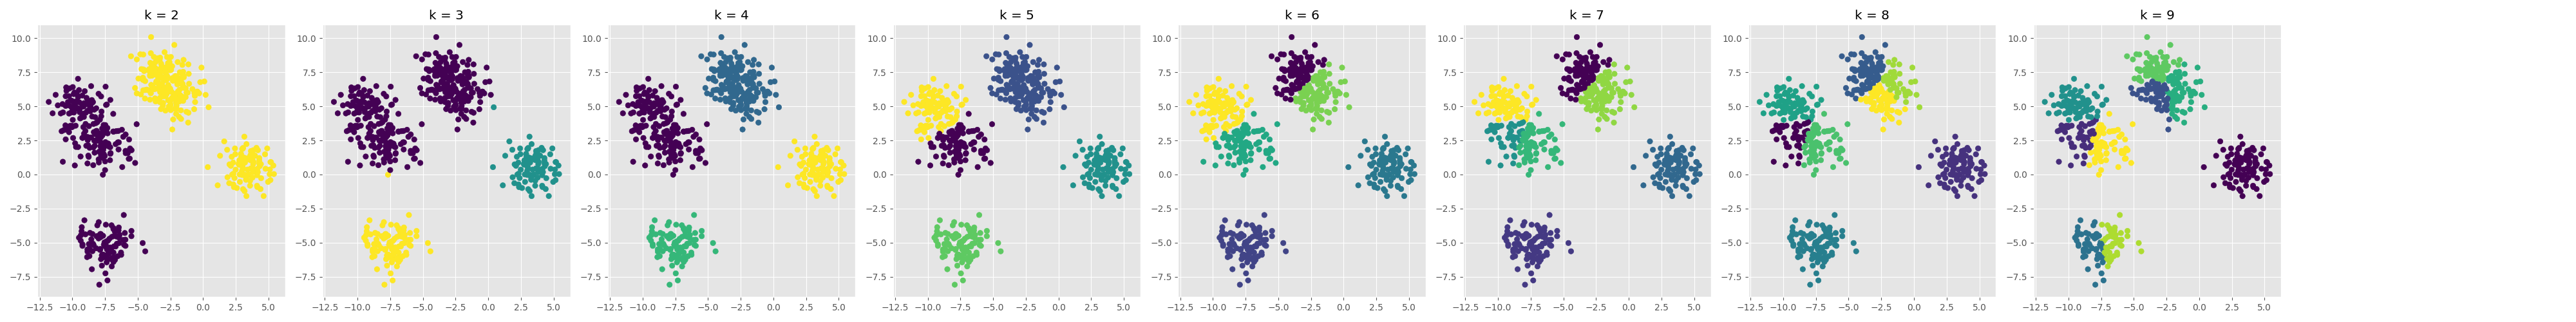

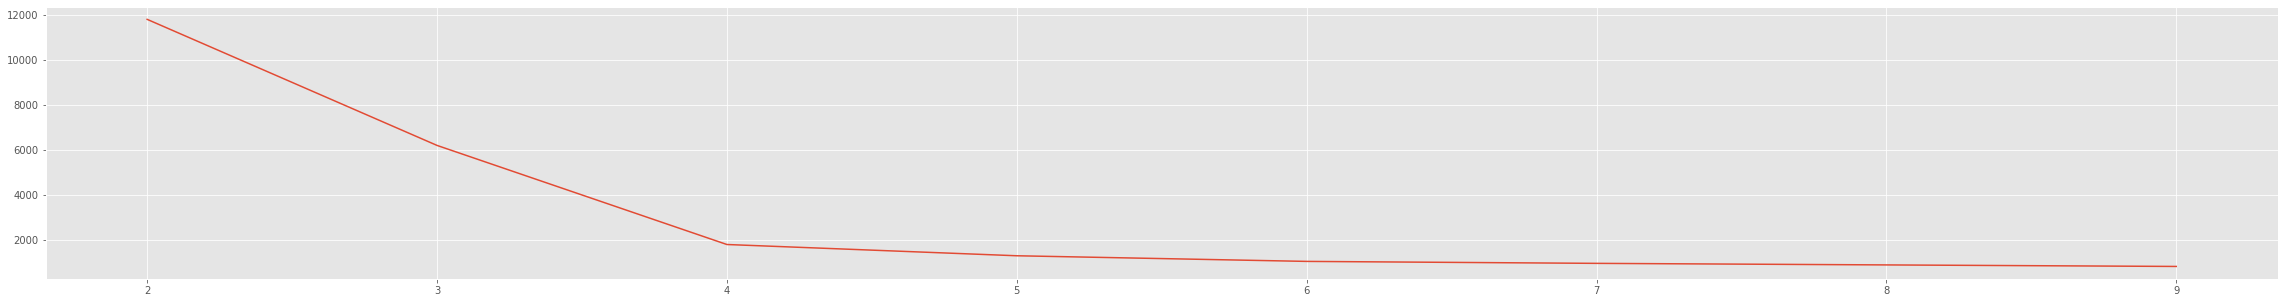

In [ ]:
plt.rcParams['figure.figsize']=(40,5)
plt.plot(range(2, 10), criteries)

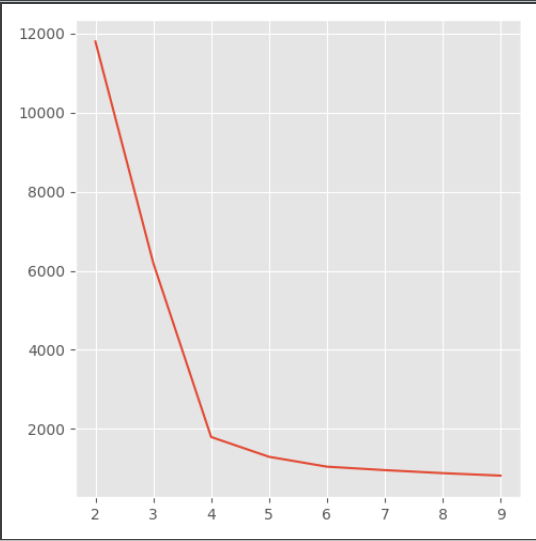

По графику оптимальное количество кластеров равно 4

Финальный результат модели KMeans

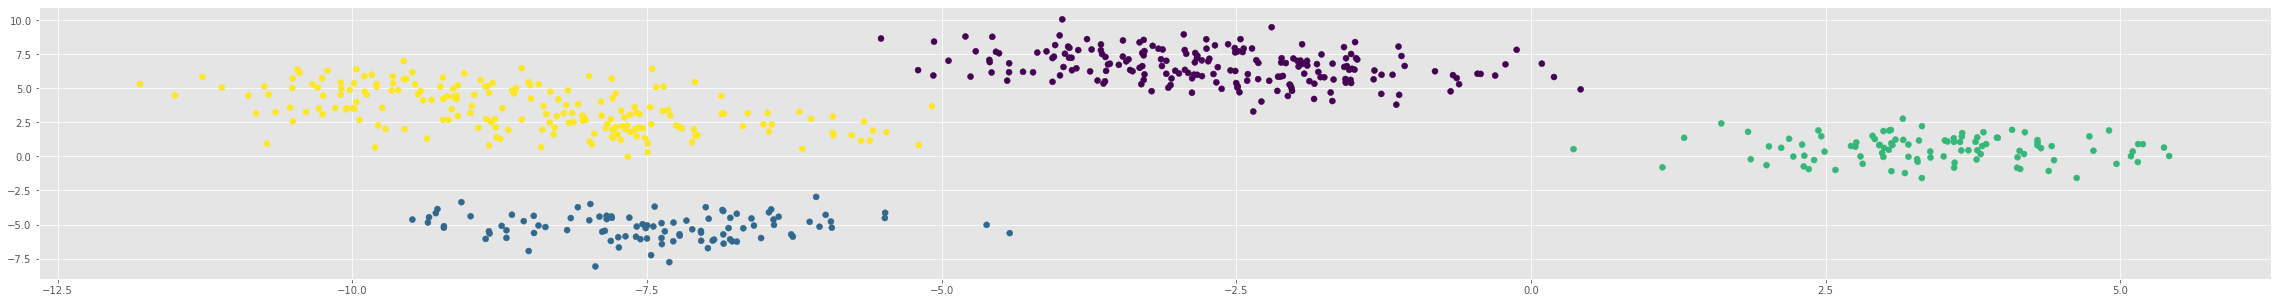

In [ ]:
kmeansModel = KMeans(n_clusters=4, random_state=43)
kmeansModel.fit(X)
plot.scatter(X[:,0], X[:,1], c=kmeansModel.labels_)

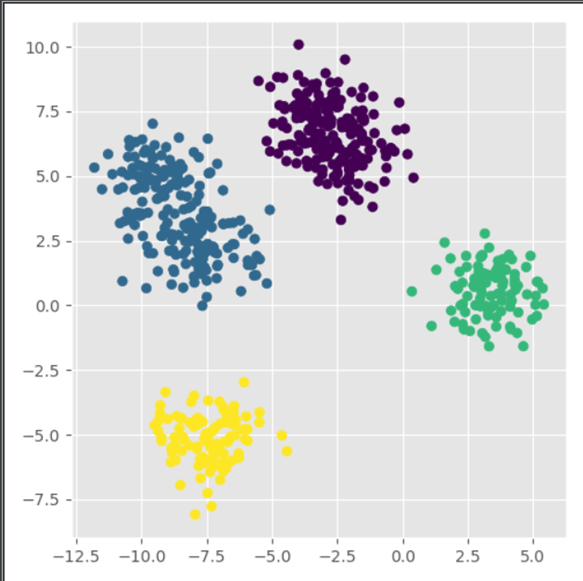

#### DBscan

Определяем и обучаем модель DBscan

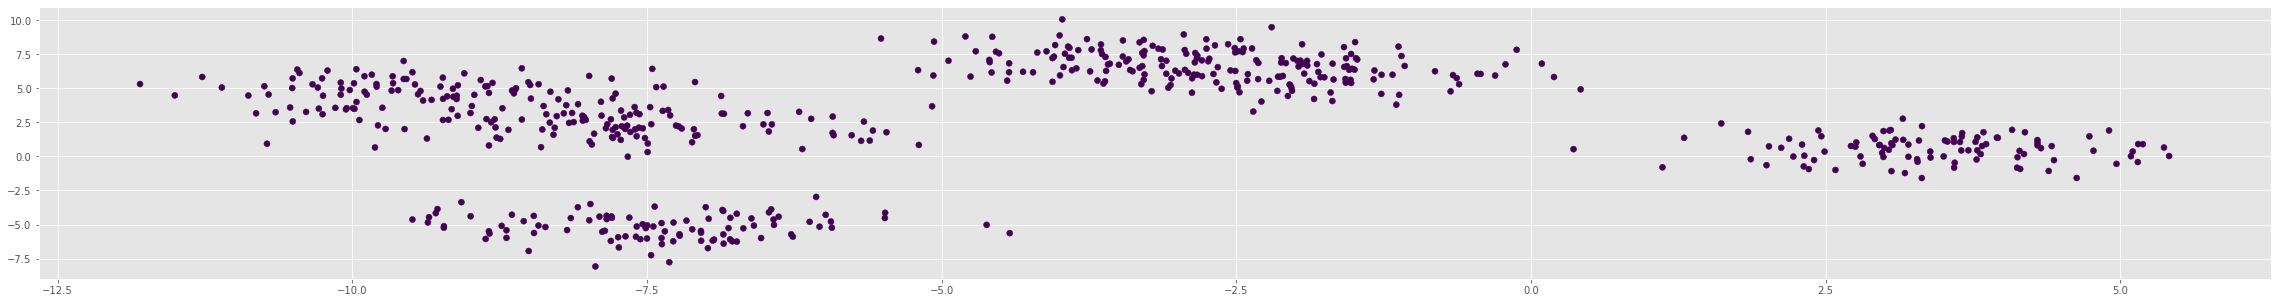

In [ ]:
clustering = DBSCAN(eps=9, min_samples=5).fit_predict(X)
plot.scatter(X[:,0], X[:,1], c=clustering);

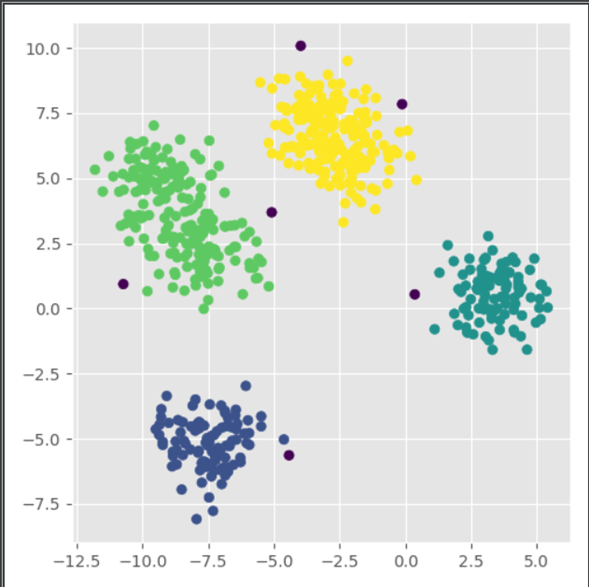

DBscan плохо разделяет скученные кластеры. Приходится увеличивать значение min_samples, что увеличивает количество выбросов.

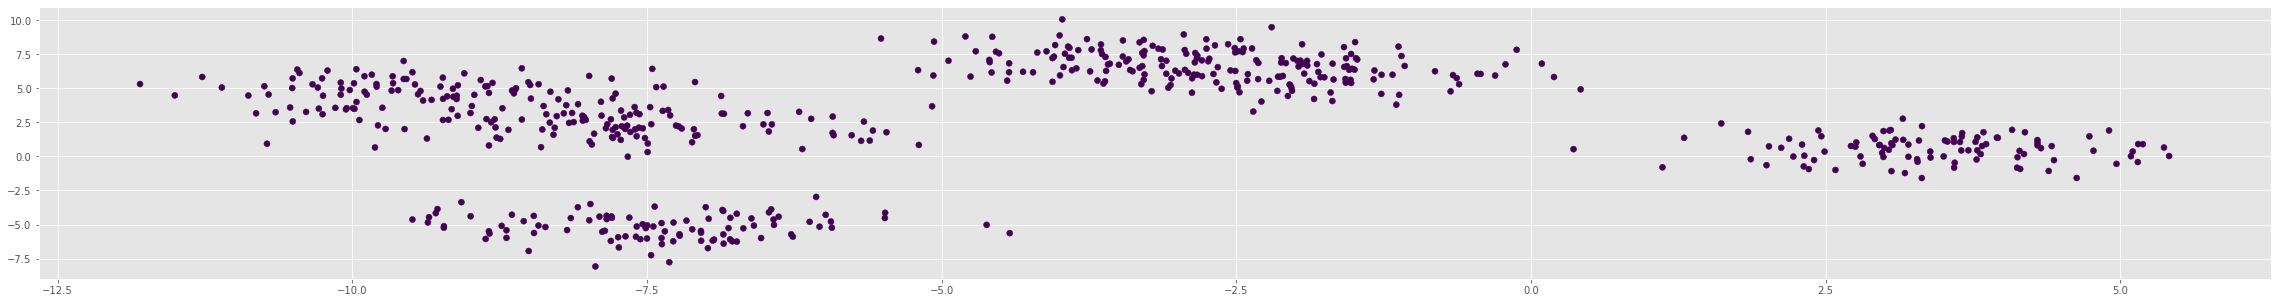

In [ ]:
clustering = DBSCAN(eps=14, min_samples=5).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=clustering);

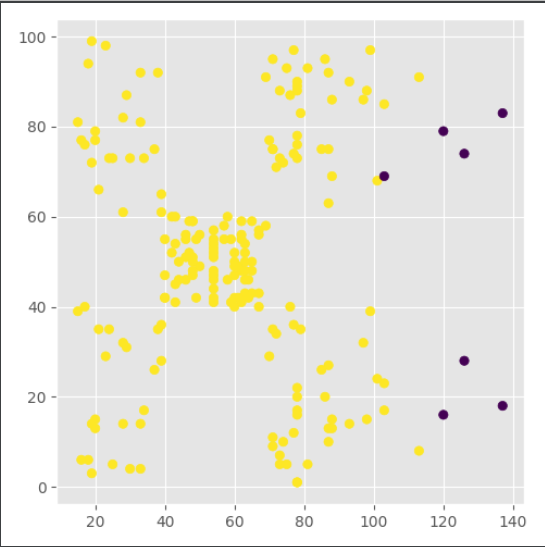

Более грубая кластеризация eps=14

### Задание 2

Импортируем файл mall_customers.csv и создаем датафрейм.

In [ ]:
#https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
data = pd.read_csv("Mall_Customers.csv")
X = np.transpose([data.loc[:,"Annual Income (k$)"], data.loc[:,"Spending Score (1-100)"]])
print(data.head())
print(X[:5], "More...")

FileNotFoundError: ignored

Сырые данные

In [ ]:
plt.rcParams['figure.figsize']=(8,4)
plt.scatter(X[:,0], X[:,1])

#### KMeans

In [ ]:
results_scalar = []
plt.rcParams['figure.figsize']=(22,3)
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=5)
  kmeansModel.fit(X)
  results_scalar.append(kmeansModel.inertia_)
  plt.subplot(190 + k - 1)
  plt.scatter(X[:,0], X[:,1], c=kmeansModel.labels_)
  plt.title("k = " + str(k))
plt.show()

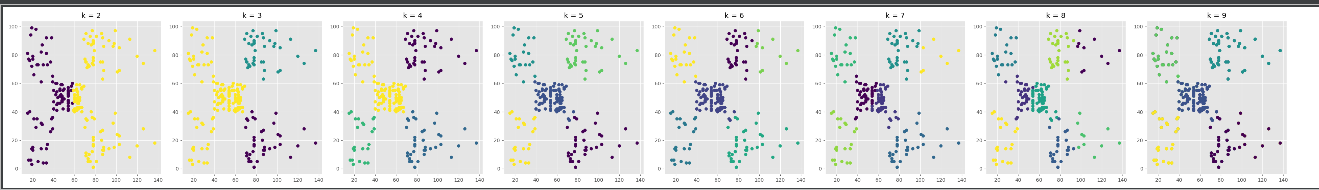

In [ ]:
plt.rcParams['figure.figsize']=(8,4)
plt.plot(range(2, 10), results_scalar)

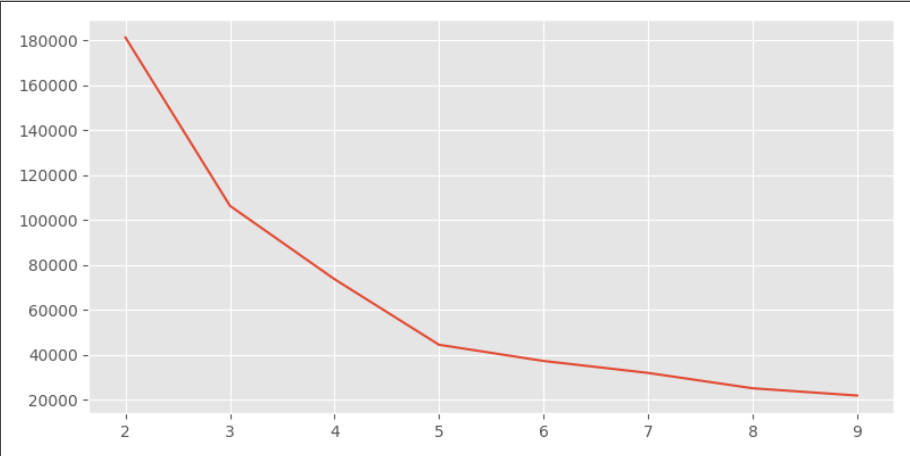

In [ ]:
kmeansModel = KMeans(n_clusters=5, random_state=4)
kmeansModel.fit(X)
plt.rcParams['figure.figsize']=(12,6)
plt.scatter(X[:,0], X[:,1], c=kmeansModel.labels_)

По кластерам людей можно разделить на бедных, средний класс и богатых. Также бедные и богатые делятся на тех, кто много или  мало тратит на покупки.

#### DBscan

In [ ]:
clustering = DBSCAN(eps=9, min_samples=3).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=clustering);

DBscan плохо определяет кластеры бедных, так как их плотность ниже среднего класса. Однако очень хорошо определены выбросы в виде людей со свербольшими доходами.

# Лабораторная работа №2

---



**Современные инструменты анализа данных - Анализ текста**


Выполнил: Рябоконь Архип P32302

---



## Задание

**ваши жанры Pop и Country** 
1. Для полученных жанров провести все этапы предварительной обработки текста (как в примере), обучить наивный байесовский классификатор, численно оценить его работу. Для улучшения качества обучения модели можно попробовать избавиться от знаков препинания и проследить, чтобы процентное соотношение песен обоих жанров было примерно 50 на 50.
2. Найти (нагуглить) по песне каждого из жанров, которые Вам достались, после необходимой обработки их текстов определить жанр обеих песен с помощью обученной в ходе выполнения предыдущего пункта модели.
3. С помощью набора данных по ссылке аналогичным образом научить модель отличать тексты песен Дэвида Боуи от текстов песен Пола МакКартни 
https://www.kaggle.com/italomarcelo/dataset-lyrics-music-mini

## Ход работы

Импортируем библиотеки

In [ ]:
import nltk

from nltk.tokenize import word_tokenize
nltk.download('punkt')

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Задание 1

Импортируем файл dataset.csv и создаем датафрейм.

In [ ]:
#https://www.kaggle.com/datasets/mehedihasan9021/movie-script-dataset
data = pd.read_csv("dataset.csv")
columns = data[["genre", "lyrics"]]
columns.head()

FileNotFoundError: ignored

Оставляем только 2 жанра, убираем лишнее.

In [ ]:
columns = columns[(columns.genre == "Christian") | (columns.genre == "Rock")]
print(columns["genre"].value_counts())

Понижаем строки, токенизируем

In [ ]:
def lower_tokenize(columns, lyrics="lyrics"):
  columns[lyrics] = columns[lyrics].str.lower()
  columns[lyrics] = columns.apply(lambda row: nltk.word_tokenize(row[lyrics]), axis=1)

lower_tokenize(columns)
print(columns)

Убираем стоп слова, лемматизируем избавляемся от знаков

In [ ]:
def format_lemmatize(columns, lyrics="lyrics"):
  noise = stopwords.words('english')

  withoutstop = columns[lyrics].apply(lambda x: [item for item in x if item not in noise])
  without_stop = []
  for a in withoutstop:    
    without_stop.append(", ".join(a))
  columns[lyrics] = without_stop

  lemmatized = columns[lyrics].apply(lambda x: [lemmatizer.lemmatize(x)])
  lemma = []
  for a in lemmatized:    
    lemma.append(", ".join(a))
  columns[lyrics] = lemma

format_lemmatize(columns)
print(columns["lyrics"])

Импортируем библиотеки

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import * 

Разделим на тренировочные и тестовые данные

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(columns.lyrics, columns.genre, train_size = 0.7)

Векторизация

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 3))
vectorized_x_train = vectorizer.fit_transform(x_train)

Классификация и тест

In [ ]:
clf = MultinomialNB()
clf.fit(vectorized_x_train, y_train)
vectorized_x_test = vectorizer.transform(x_test)
clf.predict(vectorized_x_test)

Оценка

In [ ]:
pred = clf.predict(vectorized_x_test)
print(classification_report(y_test, pred))

### Задание 2

Country music **Midland - Drinkin' Problem Lyrics**

Pop music **I Want To Hold Your Hand” by The Beatles**

In [ ]:
song_christian = "I'm waitin I'm waiting on You Lord And I am hopeful I'm waiting on You Lord Though it is painful but patiently I will wait And I will move ahead bold and confident Taking every step in obedience While I'm waiting I will serve You While I'm waiting I will worship While I'm waiting I will not faint I'll be running the race even while I wait I'm waiting I'm waiting on You Lord And I am peaceful I'm waiting on You Lord Though it's not easy no but faithfully I will wait Yes I will wait And I will move ahead bold and confident Taking every step in obedience While I'm waiting I will serve You While I'm waiting I will worship While I'm waiting I will not faint I'll be running the race even while I wait I will move ahead bold and confident I'll be taking every step in obedience yeah While I'm waiting I will serve You While I'm waiting I will worship While I'm waiting I will not faint And I will serve You while I'm waiting I will worship while I'm waiting I will serve You while I'm waiting I will worship while I'm waiting I will serve You while I'm waiting I will worship while I'm waiting on You Lord I will serve You while I'm waiting I will worship while I'm waiting I will serve You while I'm waiting I will worship while I'm waiting"
song_rock = "Is this the real life Is this just fantasy Caught in a landside No escape from reality Open your eyes Look up to the skies and see I'm just a poor boy I need no sympathy Because I'm easy come easy go Little high little low Any way the wind blows doesn't really matter to Me to me Mamaaa Just killed a man Put a gun against his head pulled my trigger Now he's dead Mamaaa life had just begun But now I've gone and thrown it all away Mama oooh Didn't mean to make you cry If I'm not back again this time tomorrow Carry on carry on as if nothing really matters Too late my time has come Sends shivers down my spine body's aching all The time Goodbye everybody I've got to go Gotta leave you all behind and face the truth Mama oooh I don't want to die I sometimes wish I'd never been born at all I see a little silhouetto of a man Scaramouch Scaramouch will you do the Fandango Thunderbolts and lightning very very frightening me Galileo Galileo Galileo Galileo Galileo Figaro - magnificoo I'm just a poor boy nobody loves me He's just a poor boy from a poor family Spare him his life from this monstrosity Easy come easy go will you let me go Bismillah No we will not let you go Let him go Bismillah We will not let you go Let him go Bismillah We will not let you go Let me go Will not let you go Let me go Never Never let you go Let me go Never let you go Let me go Ah No no no no no no no Oh mama mia mama mia mama mia let me go Beelzebub has a devil put aside for me for me For meee So you think you can stop me and spit in my eye So you think you can love me and leave me to die Oh baby can't do this to me baby Just gotta get out just gotta get right outta here Nothing really matters Anyone can see Nothing really matters Nothing really matters to me Any way the wind blows"

mycolumns = pd.DataFrame([["christian", song_christian], ["rock", song_rock]], columns=["genre", "lyrics"], index=[1, 2])
print(mycolumns)

Обработка

In [ ]:
lower_tokenize(mycolumns)
format_lemmatize(mycolumns)
print(mycolumns)

Используем уже тренированную модель

In [ ]:
vectorized_song_test = vectorizer.transform(mycolumns.lyrics)
clf.predict(vectorized_song_test)

Предсказания верны

### Задание 3

In [ ]:
#https://www.kaggle.com/datasets/italomarcelo/dataset-lyrics-music-mini
data = pd.read_csv("dataset-lyrics-musics-mini.csv")
columns = data[["cantorNome", "letra"]]
print(columns)

In [ ]:
columns = columns[(columns.cantorNome == "david-bowie") | (columns.cantorNome == "paul-mccartney")][19:]
print(columns["cantorNome"].value_counts())

In [ ]:
lower_tokenize(columns, lyrics="letra")
format_lemmatize(columns, lyrics="letra")
print(columns)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(columns.letra, columns.cantorNome, train_size = 0.7)

vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorized_x_train = vectorizer.fit_transform(x_train)

clf = MultinomialNB()
clf.fit(vectorized_x_train, y_train)
vectorized_x_test = vectorizer.transform(x_test)
clf.predict(vectorized_x_test)[:20]

ngram_range подобран руками

In [ ]:
pred = clf.predict(vectorized_x_test)
print(classification_report(y_test, pred))

Ну собственно как так то и получилось. В colab не очень понравиось раотать если честно